##  Question 1 (40 pts)
Model the dataset with Decision Tree (test_size = 0.2). Report:
Model accuracy
Confusion matrix (seaborn heatmap)

Predictions for:
    
    Class 1, Male, Age 28, Fare 20.5
    
    Class 2, Male, Age 70, Fare 7.5
    
    Class 3, Female, Age 25, Fare 6.76
    
    Class 2, Female, Age 43, Fare 12.88

## Answer:

C:\Users\dmashirapov\AppData\Local\Temp\ipykernel_20676\847942368.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


Accuracy score: 73.18%

Predictions:
Case 1: Did not survive
Case 2: Did not survive
Case 3: Did not survive
Case 4: Survived


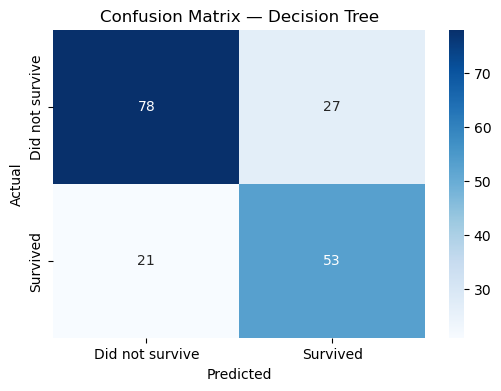

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv("sank.csv")

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Features + Target
X = df[['Class', 'Sex', 'Age', 'Fare']]
y = df['Alive']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions + accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy*100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Predictions for the 4 records
test_cases = pd.DataFrame({
    'Class': [1, 2, 3, 2],
    'Sex': [0, 0, 1, 1],
    'Age': [28, 70, 25, 43],
    'Fare': [20.5, 7.5, 6.76, 12.88]
})
predictions = clf.predict(test_cases)

print("\nPredictions:")
for i, pred in enumerate(predictions):
    print(f"Case {i+1}: {'Survived' if pred == 1 else 'Did not survive'}")

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Did not survive", "Survived"],
    yticklabels=["Did not survive", "Survived"]
)
plt.title("Confusion Matrix — Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Question 2 (40 pts)
Model with Logistic Regression (test_size = 0.2). Report:

Model accuracy

Confusion matrix

Predictions for the same 4 rows

## Answer: 

Model Accuracy: 79.89%
Case 1: Did not survive
Case 2: Did not survive
Case 3: Survived
Case 4: Survived


C:\Users\dmashirapov\AppData\Local\Temp\ipykernel_20676\3427928877.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


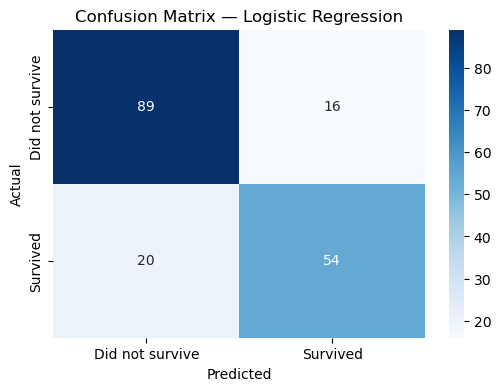

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
df = pd.read_csv("sank.csv")

# Handle missing ages
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Encode 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Split features and target
X = df[['Class', 'Sex', 'Age', 'Fare']]
y = df['Alive']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Predictions for the 4 rows
test_cases = pd.DataFrame({
    'Class': [1, 2, 3, 2],
    'Sex': [0, 0, 1, 1],
    'Age': [28, 70, 25, 43],
    'Fare': [20.5, 7.5, 6.76, 12.88]
})
predictions = log_reg.predict(test_cases)

print(f"Model Accuracy: {accuracy*100:.2f}%")
for i, pred in enumerate(predictions):
    print(f"Case {i+1}: {'Survived' if pred == 1 else 'Did not survive'}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Did not survive", "Survived"],
    yticklabels=["Did not survive", "Survived"]
)
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Question 3 (20 pts): Which model performs better and why?**

### **Answer — Logistic Regression vs Decision Tree**
Logistic Regression performs **better** than the Decision Tree model for this dataset.

### **Reasons**
#### **1. Higher Accuracy**
* **Logistic Regression:** 80%
* **Decision Tree:** 73%
  Logistic Regression clearly performs better on unseen (test) data.

#### **2. Less Overfitting**
Decision Trees often overfit because they learn very detailed rules from training data.
Logistic Regression is simpler and generalizes better on small and structured datasets.

#### **3. Linear Patterns Fit Logistic Regression**
Survival probability depends on:
* Class
* Sex
* Age
* Fare
These variables show a mostly **linear relationship** with survival, which suits Logistic Regression better.

#### **4. Decision Tree Instability**
Small changes in data can lead to very different tree structures, making Decision Trees less stable and less reliable.

### **Conclusion**

**Logistic Regression is the better model** because it provides:
* Higher accuracy
* More stable predictions
* Better generalization to new data